# 1) Climate Modeling of Earth's Systems: Exploring Coupled Interactions in a Long-Term Simulation.

## Description:
### This Python code presents a climate modeling framework that investigates the intricate interactions between key environmental factors over an extended timeframe of 1000 years. By incorporating a robust Runge-Kutta numerical method, the simulation delves into the mutual influences of greenhouse gas concentrations, solar radiation variations, ice melting dynamics, ocean circulation patterns, and wind effects on Earth's climate.

### The resulting visualizations provide insights into the complex climate dynamics that drive long-term changes and how the Earth's systems interact and respond to altering environmental conditions.

- The code's implementation of the Runge-Kutta numerical method underscores its importance in accurately solving
  systems of coupled differential equations in diverse scientific simulations.
- The albedo coefficients (albedo_ice and albedo_water) reflect the real-world complexity of surface reflectivity
  and its impact on the energy balance of the planet.
- The simulation exemplifies the value of comprehensive modeling to study complex systems, providing a tool for
  researchers, educators, and policymakers to explore the ramifications of various climate-related factors.
- The in-depth visualizations offer a dynamic representation of climate responses, fostering a nuanced understanding
  of how small changes in individual variables can trigger substantial global effects.


## a) By Runge-Kutta Method:

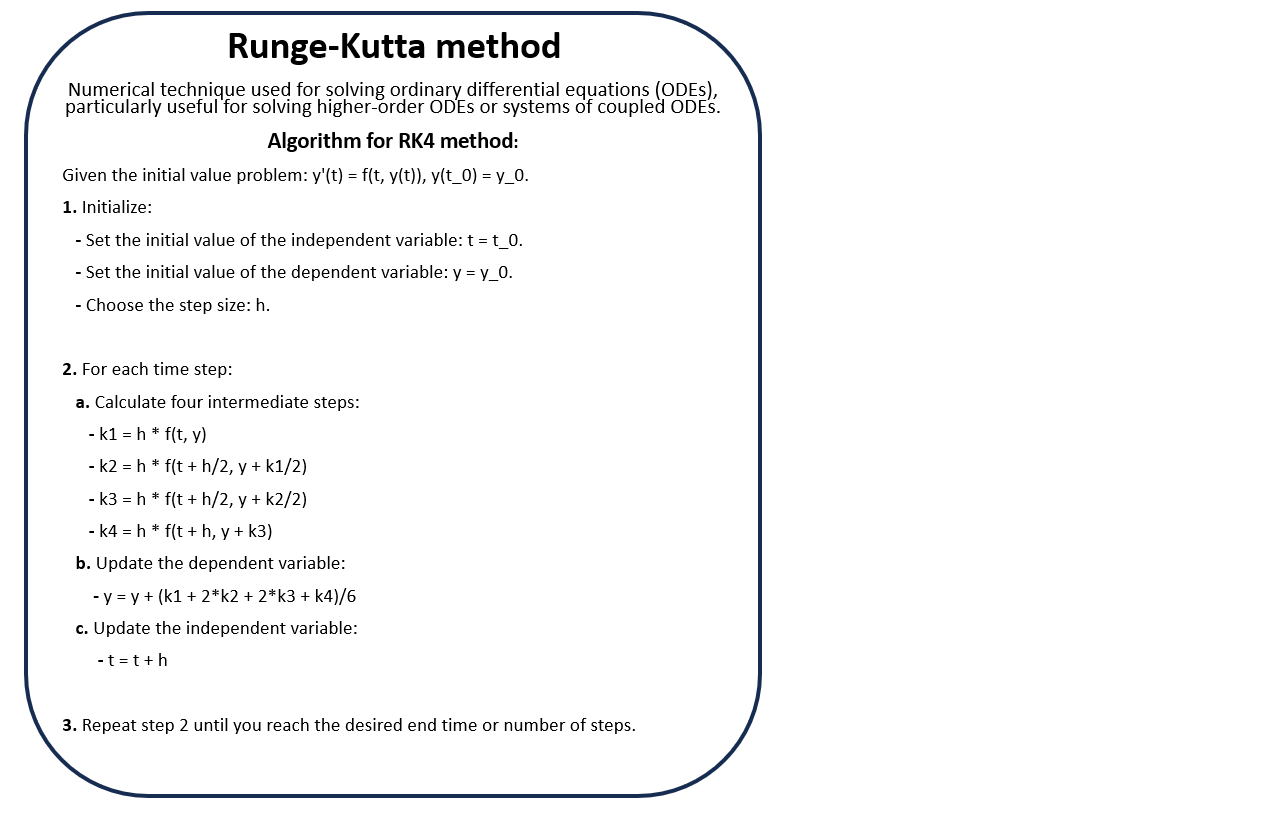

C:\Users\HP\AppData\Local\Temp\ipykernel_13624\3570044180.py:32: RuntimeWarning: overflow encountered in double_scalars
  return -wind_constant * (temperature - T0) * wind
C:\Users\HP\AppData\Local\Temp\ipykernel_13624\3570044180.py:64: RuntimeWarning: invalid value encountered in double_scalars
  greenhouse_gas_effect(temperature_values[-1] + 0.5 * k1_temp, CO2_values[-1]) +


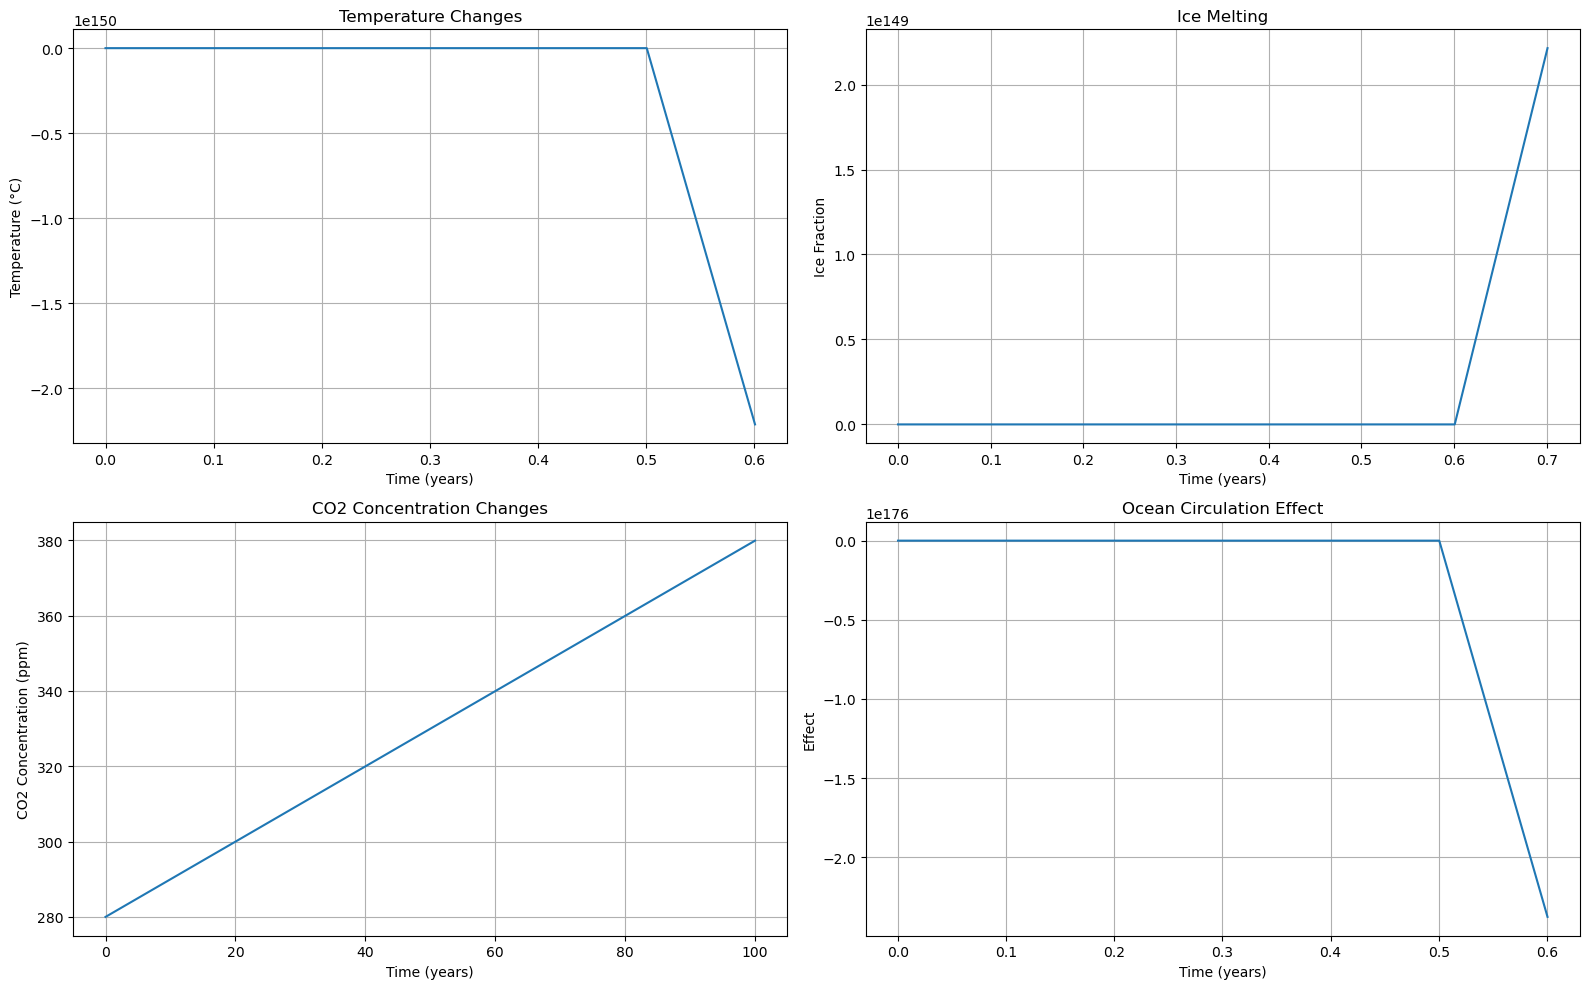

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Constants 
k1 = 0.1     # Proportionality constant for greenhouse gas effect
k2 = 0.01    # Proportionality constant for solar radiation
albedo_ice = 0.8
albedo_water = 0.2
latent_heat_fusion = 334   # J/kg, latent heat of fusion for ice
T0 = -10                   # Initial temperature in °C
initial_ice_fraction = 1.0
ocean_circulation_constant = 0.0001
wind_constant = 0.00001  

# Time values
t_values = np.linspace(0, 100, 1000)  # Time from 0 to 1000 years

# Model equations
def greenhouse_gas_effect(T, CO2):
    return -k1 * CO2 * (T - T0)

def solar_radiation_effect(T, S):
    return k2 * (S - 1361)  # 1361 W/m^2 is the solar constant

def ice_melting_effect(ice_fraction, temperature):
    return -ice_fraction * (temperature - T0) * latent_heat_fusion

def ocean_circulation_effect(temperature, ice_fraction):
    return -ocean_circulation_constant * (temperature - T0) * (1 - ice_fraction)

def wind_effect(temperature, wind):
    return -wind_constant * (temperature - T0) * wind

# Initial conditions
initial_CO2 = 280  # Pre-industrial CO2 concentration in ppm
initial_S = 1361   # Initial solar radiation in W/m^2

# Arrays to store results
temperature_values = [T0]
CO2_values = [initial_CO2]
solar_values = [initial_S]
ice_fraction_values = [initial_ice_fraction]

# Additional arrays for plotting
CO2_concentration_values = [initial_CO2]
ocean_circulation_effect_values = [ocean_circulation_effect(T0, initial_ice_fraction)]

# Calculate values using Runge-Kutta method
for i in range(1, len(t_values)):
    dt = t_values[i] - t_values[i-1]
    
    CO2_new = CO2_values[-1] + 0.1
    solar_new = solar_values[-1] + 1

    # Calculate intermediate values using Runge-Kutta stages
    k1_temp = dt * (
        greenhouse_gas_effect(temperature_values[-1], CO2_values[-1]) + 
        solar_radiation_effect(temperature_values[-1], solar_values[-1]) + 
        ice_melting_effect(ice_fraction_values[-1], temperature_values[-1]) + 
        ocean_circulation_effect(temperature_values[-1], ice_fraction_values[-1]) + 
        wind_effect(temperature_values[-1], ocean_circulation_effect_values[-1]))  
    
    k2_temp = dt * (
        greenhouse_gas_effect(temperature_values[-1] + 0.5 * k1_temp, CO2_values[-1]) + 
        solar_radiation_effect(temperature_values[-1] + 0.5 * k1_temp, solar_values[-1]) + 
        ice_melting_effect(ice_fraction_values[-1], temperature_values[-1] + 0.5 * k1_temp) + 
        ocean_circulation_effect(temperature_values[-1] + 0.5 * k1_temp, ice_fraction_values[-1]) + 
        wind_effect(temperature_values[-1] + 0.5 * k1_temp, ocean_circulation_effect_values[-1]))
    
    k3_temp = dt * (
        greenhouse_gas_effect(temperature_values[-1] + 0.5 * k2_temp, CO2_values[-1]) + 
        solar_radiation_effect(temperature_values[-1] + 0.5 * k2_temp, solar_values[-1]) + 
        ice_melting_effect(ice_fraction_values[-1], temperature_values[-1] + 0.5 * k2_temp) + 
        ocean_circulation_effect(temperature_values[-1] + 0.5 * k2_temp, ice_fraction_values[-1]) + 
        wind_effect(temperature_values[-1] + 0.5 * k2_temp, ocean_circulation_effect_values[-1]))
    
    k4_temp = dt * (
        greenhouse_gas_effect(temperature_values[-1] + k3_temp, CO2_values[-1]) + 
        solar_radiation_effect(temperature_values[-1] + k3_temp, solar_values[-1]) + 
        ice_melting_effect(ice_fraction_values[-1], temperature_values[-1] + k3_temp) + 
        ocean_circulation_effect(temperature_values[-1] + k3_temp, ice_fraction_values[-1]) + 
        wind_effect(temperature_values[-1] + k3_temp, ocean_circulation_effect_values[-1]))
    
    # Update state variables using Runge-Kutta weighted average
    temperature_new = temperature_values[-1] + (k1_temp + 2 * k2_temp + 2 * k3_temp + k4_temp) / 6
    ice_fraction_new = ice_fraction_values[-1] - (temperature_values[-1] - T0) * dt
    
    CO2_values.append(CO2_new)
    solar_values.append(solar_new)
    temperature_values.append(temperature_new)
    ice_fraction_values.append(ice_fraction_new)
    
    # Calculate additional values for plotting
    CO2_concentration_values.append(CO2_new)
    ocean_circulation_effect_values.append(ocean_circulation_effect(temperature_values[-1], ice_fraction_values[-1]))

# Plotting
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.plot(t_values, temperature_values, label='Temperature')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t_values, ice_fraction_values, label='Ice Fraction')
plt.xlabel('Time (years)')
plt.ylabel('Ice Fraction')
plt.title('Ice Melting')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(t_values, CO2_concentration_values, label='CO2 Concentration')
plt.xlabel('Time (years)')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('CO2 Concentration Changes')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(t_values, ocean_circulation_effect_values, label='Ocean Circulation Effect')
plt.xlabel('Time (years)')
plt.ylabel('Effect')
plt.title('Ocean Circulation Effect')
plt.grid()

plt.tight_layout()
plt.show()


## b) By Euler Method:

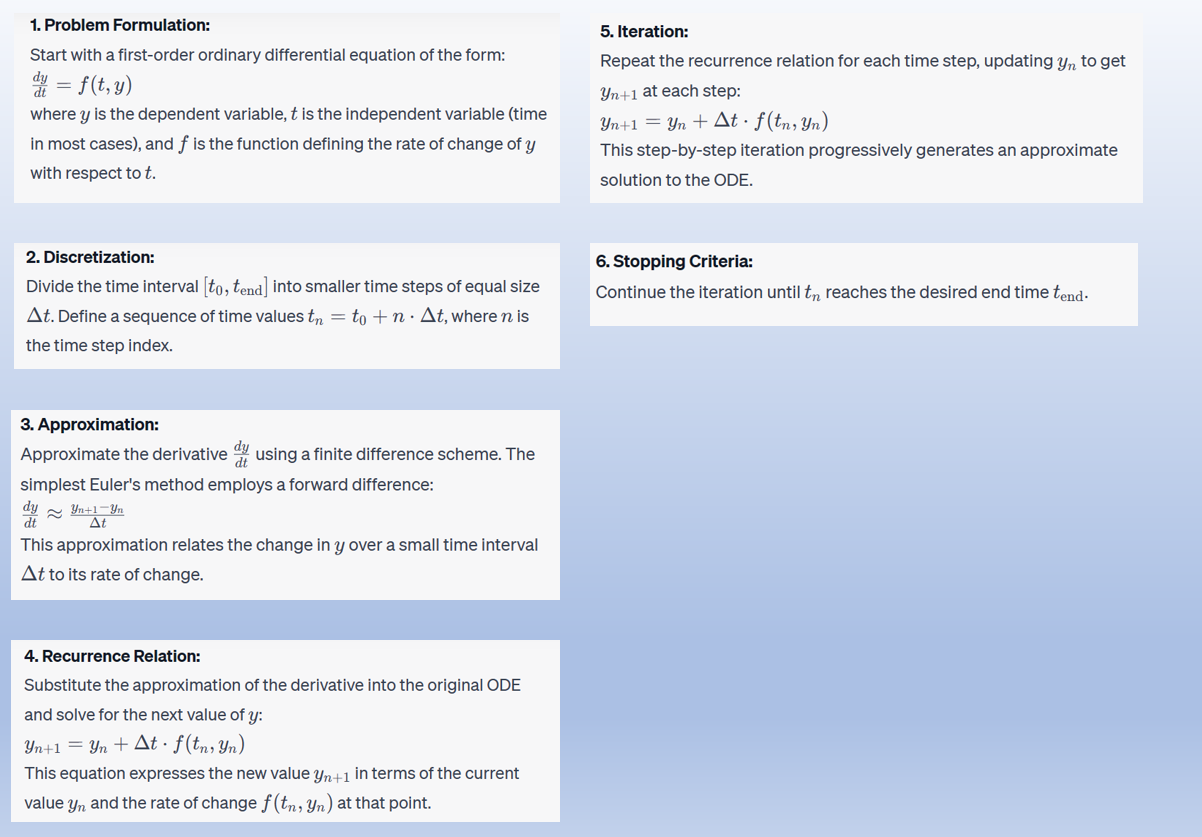

C:\Users\HP\AppData\Local\Temp\ipykernel_13624\1739411559.py:32: RuntimeWarning: overflow encountered in double_scalars
  return -wind_constant * (temperature - T0) * wind
C:\Users\HP\AppData\Local\Temp\ipykernel_13624\1739411559.py:62: RuntimeWarning: invalid value encountered in double_scalars
  temperature_change_due_to_greenhouse_gas +


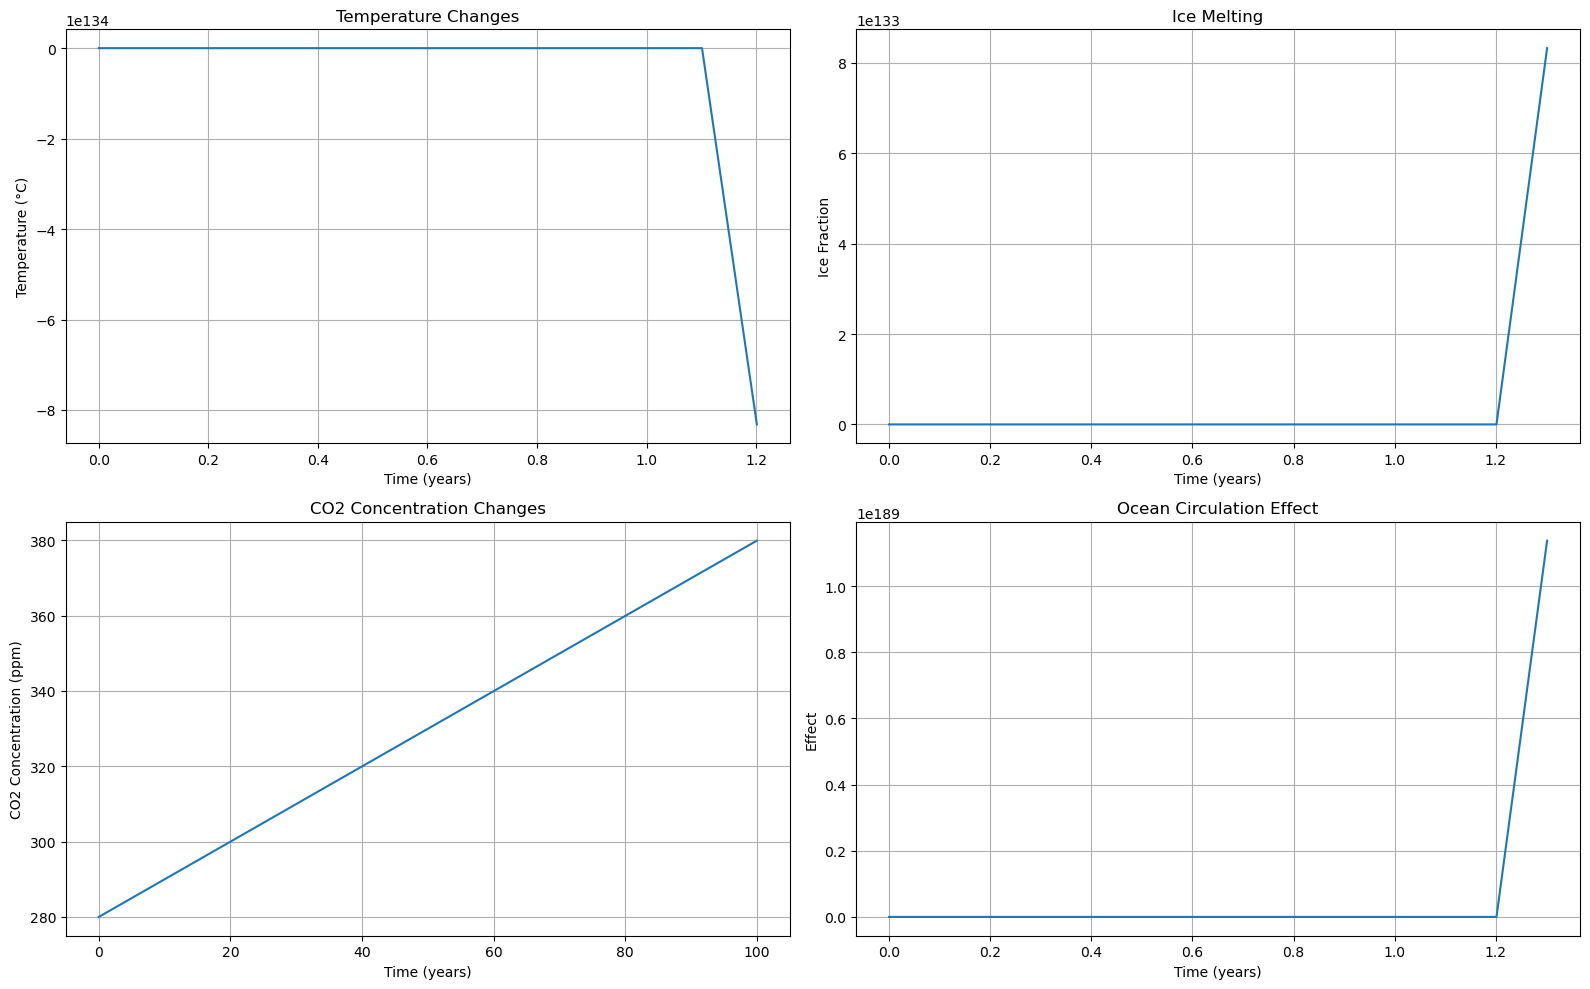

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Constants 
k1 = 0.1     # Proportionality constant for greenhouse gas effect
k2 = 0.01    # Proportionality constant for solar radiation
albedo_ice = 0.8
albedo_water = 0.2
latent_heat_fusion = 334   # J/kg, latent heat of fusion for ice
T0 = -10                   # Initial temperature in °C
initial_ice_fraction = 1.0
ocean_circulation_constant = 0.0001
wind_constant = 0.00001  

# Time values
t_values = np.linspace(0, 100, 1000)  # Time from 0 to 1000 years

# Model equations
def greenhouse_gas_effect(T, CO2):
    return -k1 * CO2 * (T - T0)

def solar_radiation_effect(T, S):
    return k2 * (S - 1361)  # 1361 W/m^2 is the solar constant

def ice_melting_effect(ice_fraction, temperature):
    return -ice_fraction * (temperature - T0) * latent_heat_fusion

def ocean_circulation_effect(temperature, ice_fraction):
    return -ocean_circulation_constant * (temperature - T0) * (1 - ice_fraction)

def wind_effect(temperature, wind):
    return -wind_constant * (temperature - T0) * wind

# Initial conditions
initial_CO2 = 280  # Pre-industrial CO2 concentration in ppm
initial_S = 1361   # Initial solar radiation in W/m^2

# Arrays to store results
temperature_values = [T0]
CO2_values = [initial_CO2]
solar_values = [initial_S]
ice_fraction_values = [initial_ice_fraction]

# Additional arrays for plotting
CO2_concentration_values = [initial_CO2]
ocean_circulation_effect_values = [ocean_circulation_effect(T0, initial_ice_fraction)]

# Calculate values using Euler's method (including wind effect)
for i in range(1, len(t_values)):
    dt = t_values[i] - t_values[i-1]
    
    CO2_new = CO2_values[-1] + 0.1
    solar_new = solar_values[-1] + 1

    temperature_change_due_to_greenhouse_gas = greenhouse_gas_effect(temperature_values[-1], CO2_values[-1])
    temperature_change_due_to_solar_radiation = solar_radiation_effect(temperature_values[-1], solar_values[-1])
    temperature_change_due_to_ice_melting = ice_melting_effect(ice_fraction_values[-1], temperature_values[-1])
    temperature_change_due_to_ocean_circulation = ocean_circulation_effect(temperature_values[-1], ice_fraction_values[-1])
    temperature_change_due_to_wind = wind_effect(temperature_values[-1], temperature_change_due_to_ocean_circulation)
    
    temperature_new = temperature_values[-1] + (
        temperature_change_due_to_greenhouse_gas + 
        temperature_change_due_to_solar_radiation + 
        temperature_change_due_to_ice_melting + 
        temperature_change_due_to_ocean_circulation +
        temperature_change_due_to_wind) * dt
    
    ice_fraction_new = ice_fraction_values[-1] - (temperature_values[-1] - T0) * dt
    
    CO2_values.append(CO2_new)
    solar_values.append(solar_new)
    temperature_values.append(temperature_new)
    ice_fraction_values.append(ice_fraction_new)
    
    # Calculate additional values for plotting
    CO2_concentration_values.append(CO2_new)
    ocean_circulation_effect_values.append(temperature_change_due_to_ocean_circulation)
    
# Plotting
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
plt.plot(t_values, temperature_values, label='Temperature')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t_values, ice_fraction_values, label='Ice Fraction')
plt.xlabel('Time (years)')
plt.ylabel('Ice Fraction')
plt.title('Ice Melting')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(t_values, CO2_concentration_values, label='CO2 Concentration')
plt.xlabel('Time (years)')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('CO2 Concentration Changes')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(t_values, ocean_circulation_effect_values, label='Ocean Circulation Effect')
plt.xlabel('Time (years)')
plt.ylabel('Effect')
plt.title('Ocean Circulation Effect')
plt.grid()

plt.tight_layout()
plt.show()


# 2) Simplified Climate Change Simulation using the Navier-Stokes equation and Energy Conservation principle.

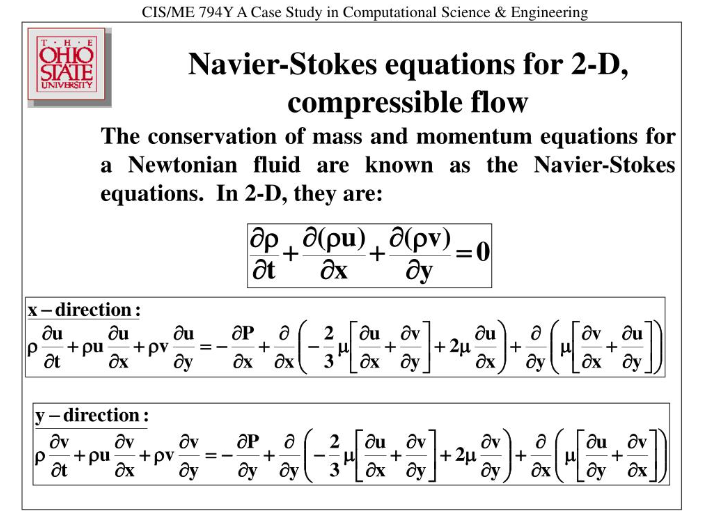

-Ohio State University, Slideshare Power Point Presentation 

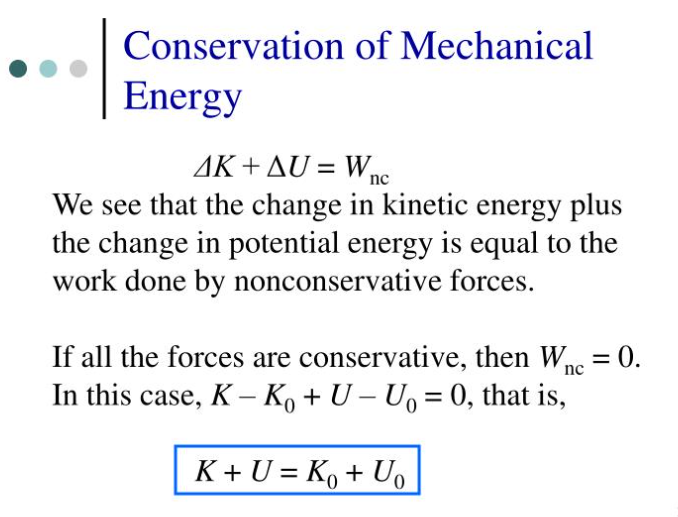

-2023 SlideServe | Powered By DigitalOfficePro

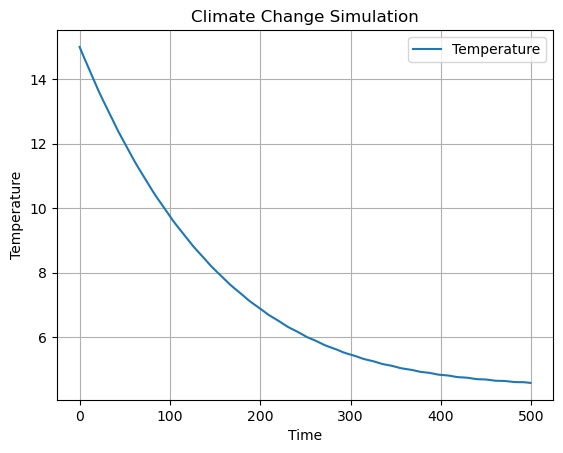

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_steps = 500
time_interval = 0.01
initial_temperature = 15.0
external_impact = 0.2
dissipation_parameter = 0.5
skew_symmetric_parameter = 0.3
gravity_force = 9.81

# Initialize variables
temperature = np.zeros(time_steps)
temperature[0] = initial_temperature

# Simulate climate change using Navier-Stokes equation and energy conservation
for t in range(1, time_steps):
    # Navier-Stokes equation with Reynolds equation
    dT_dt = -dissipation_parameter * temperature[t - 1] + external_impact * np.sin(skew_symmetric_parameter * t) \
            + (1 / temperature[t - 1]) * gravity_force
    
    # Energy conservation principle
    temperature[t] = temperature[t - 1] + dT_dt * time_interval

# Plot results
plt.plot(temperature, label='Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Climate Change Simulation')
plt.legend()
plt.grid()
plt.show()


# 3) Simplified Climate Change Simulation with CO2-temperature Feedback.

## Working Principle:

### This code simulates the relationship between atmospheric CO2 concentration and global mean temperature over time using a simple model. The simulation incorporates a basic understanding of radiative forcing, climate sensitivity, and the feedback between CO2 and temperature. 

### It is a simplified representation of CO2-temperature feedback, assuming linear relationships and disregarding many real-world complexities. 

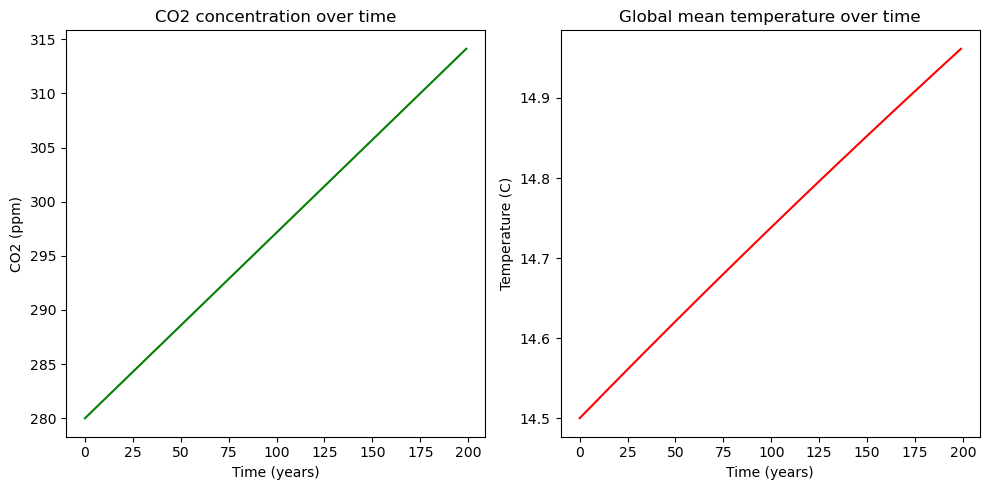

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
CO2_0 = 280     # initial CO2 concentration in ppm
T_0 = 14.5      # initial global mean temperature in C
a = 5.35        # radiative forcing parameter in W/m2
b = 0.75        # climate sensitivity parameter in C/(W/m2)
tau = 100       # adjustment time in years
dt = 1          # time step in years
n = 200         # number of time steps

# Create arrays for CO2, temperature and time
CO2 = np.zeros(n)          # CO2 concentration in ppm
T = np.zeros(n)            # global mean temperature in C
t = np.arange(0, n*dt, dt) # time in years

# Set the emission rate in GtC/year 
E = 10 

# Loop over time steps and update CO2 and temperature using simple equations
for i in range(n):
    if i == 0:
        # Set initial values
        CO2[i] = CO2_0
        T[i] = T_0
    else:
        # Update CO2 concentration using a mass balance equation
        CO2[i] = CO2[i-1] + (E*3.67/2.13)*(1-np.exp(-dt/tau))
        # Update temperature using a linear relationship with radioative forcing
        T[i] = T_0 + b*a*np.log(CO2[i]/CO2_0)

# Plot CO2 and temperature over time
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(t, CO2, color='green')
plt.xlabel('Time (years)')
plt.ylabel('CO2 (ppm)')
plt.title('CO2 concentration over time')

plt.subplot(1,2,2)
plt.plot(t, T, color='red')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (C)')
plt.title('Global mean temperature over time')

plt.tight_layout()
plt.show()


# 4) Bayesian Parameter Estimation for Climate Models.

## Description: 

### This code employs Bayesian statistics to estimate parameters of a linear model representing the relationship between time and both temperature and CO2 emissions. The goal is to find the best-fitting parameters that explain the observed data while accounting for uncertainties and noise.

### The code showcases a Bayesian approach where prior knowledge (priors) and observed data (likelihood) are combined to estimate parameters. It employs a random walk Metropolis-Hastings algorithm to explore parameter space and find the best-fitting values that explain the observed data.


## Important Bits:

1. Simulated Data:
   - Simulated temperature and CO2 emissions data are generated using linear relationships with known slopes, intercepts, and added noise.

2. Model Function:
   - `linear_model(x, slope, intercept)` defines a linear model function to predict temperature and CO2 emissions.

3. Likelihood Function:
   - `likelihood(y_observed, y_predicted, noise_stddev)` calculates the likelihood of observing the data given the predicted values, assuming Gaussian noise.

4. Priors and Posteriors:
   - Priors (Gaussian distributions) are defined for the slope and intercept parameters of temperature and CO2 emissions.
   - The code uses a Metropolis-Hastings algorithm to sample from the posterior distribution (combined likelihood and prior) for these parameters.

5. Acceptance Probabilities:
   - Acceptance probabilities are computed based on the likelihood and prior ratios for proposed and current parameter values.
   - Proposed parameter values are accepted or rejected based on these probabilities, determining the next parameter samples.

6. Parameter Estimates:
   - The code prints the estimated slope and intercept values for temperature and CO2 emissions models.

## Keep in Mind:

Bayesian estimation provides a way to incorporate uncertainty and prior information into parameter estimation. However, it may involve complex calculations and assumptions. This code provides a simplified demonstration of the process. In practical scenarios, careful consideration of prior distributions, noise assumptions, and convergence diagnostics is crucial.

C:\Users\HP\AppData\Local\Temp\ipykernel_1832\4278998226.py:59: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_prob_temp = (likelihood_temp_proposed * prior_temp_proposed) / (likelihood_temp_current * prior_temp_current)
C:\Users\HP\AppData\Local\Temp\ipykernel_1832\4278998226.py:60: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_prob_co2 = (likelihood_co2_proposed * prior_co2_proposed) / (likelihood_co2_current * prior_co2_current)
C:\Users\HP\AppData\Local\Temp\ipykernel_1832\4278998226.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_prob_temp = (likelihood_temp_proposed * prior_temp_proposed) / (likelihood_temp_current * prior_temp_current)


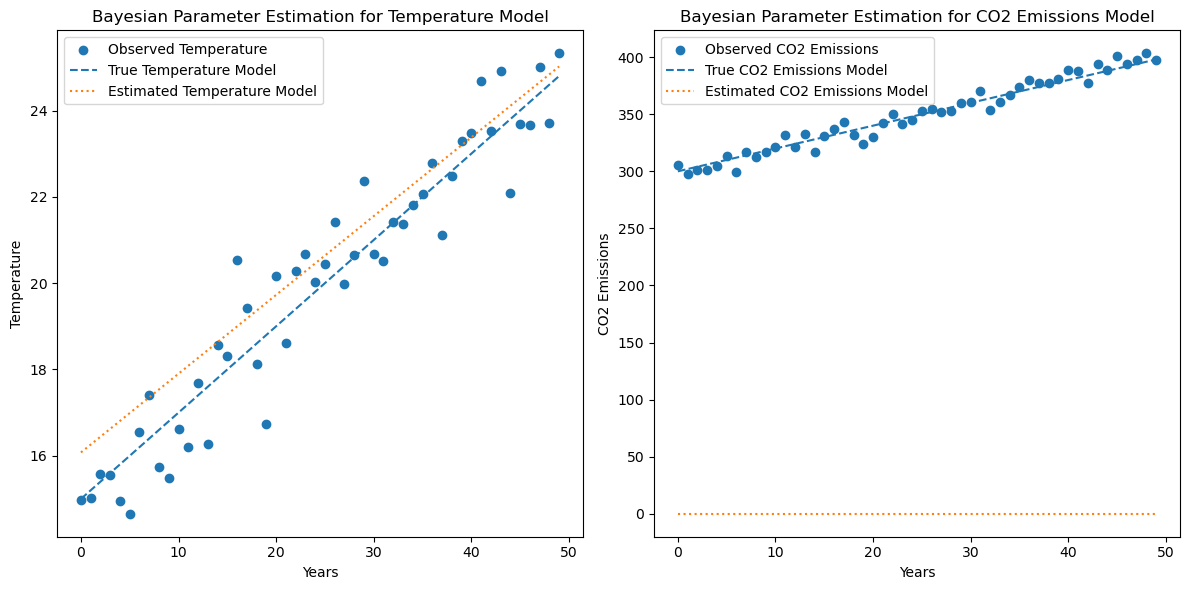

Estimated Temperature Slope: 0.18252320276237724
Estimated Temperature Intercept: 16.07723206540901
Estimated CO2 Emissions Slope: 0
Estimated CO2 Emissions Intercept: 0


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
num_years = 50
years = np.arange(num_years)
true_slope_temp = 0.2  # Temperature increase per year
true_slope_co2 = 2.0   # CO2 emissions increase per year
true_intercept_temp = 15.0
true_intercept_co2 = 300.0
temperature_data = true_slope_temp * years + true_intercept_temp + np.random.normal(0, 1, num_years)
co2_emissions_data = true_slope_co2 * years + true_intercept_co2 + np.random.normal(0, 5, num_years)

# Model function
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Likelihood function (assuming Gaussian noise)
def likelihood(y_observed, y_predicted, noise_stddev):
    return np.exp(-0.5 * np.sum(((y_observed - y_predicted) / noise_stddev) ** 2))

# Prior probabilities (Gaussian distributions)
prior_slope_temp_mean = 0
prior_slope_temp_stddev = 1
prior_slope_co2_mean = 0
prior_slope_co2_stddev = 1
prior_intercept_temp_mean = 0
prior_intercept_temp_stddev = 10
prior_intercept_co2_mean = 0
prior_intercept_co2_stddev = 10

# Bayesian parameter estimation using Metropolis-Hastings
posterior_slope_temp_mean = prior_slope_temp_mean
posterior_slope_co2_mean = prior_slope_co2_mean
posterior_intercept_temp_mean = prior_intercept_temp_mean
posterior_intercept_co2_mean = prior_intercept_co2_mean

noise_stddev = 1.0  # Known noise level
for _ in range(1000):
    # Sample from the posterior distribution using random walk Metropolis
    proposed_slope_temp = np.random.normal(posterior_slope_temp_mean, prior_slope_temp_stddev)
    proposed_slope_co2 = np.random.normal(posterior_slope_co2_mean, prior_slope_co2_stddev)
    proposed_intercept_temp = np.random.normal(posterior_intercept_temp_mean, prior_intercept_temp_stddev)
    proposed_intercept_co2 = np.random.normal(posterior_intercept_co2_mean, prior_intercept_co2_stddev)
    
    # Compute likelihoods
    likelihood_temp_current = likelihood(temperature_data, linear_model(years, posterior_slope_temp_mean, posterior_intercept_temp_mean), noise_stddev)
    likelihood_co2_current = likelihood(co2_emissions_data, linear_model(years, posterior_slope_co2_mean, posterior_intercept_co2_mean), noise_stddev)
    likelihood_temp_proposed = likelihood(temperature_data, linear_model(years, proposed_slope_temp, proposed_intercept_temp), noise_stddev)
    likelihood_co2_proposed = likelihood(co2_emissions_data, linear_model(years, proposed_slope_co2, proposed_intercept_co2), noise_stddev)
    
    # Compute priors (assuming Gaussian)
    prior_temp_current = (1 / (prior_slope_temp_stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((posterior_slope_temp_mean - prior_slope_temp_mean) / prior_slope_temp_stddev) ** 2)
    prior_co2_current = (1 / (prior_slope_co2_stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((posterior_slope_co2_mean - prior_slope_co2_mean) / prior_slope_co2_stddev) ** 2)
    prior_temp_proposed = (1 / (prior_slope_temp_stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((proposed_slope_temp - prior_slope_temp_mean) / prior_slope_temp_stddev) ** 2)
    prior_co2_proposed = (1 / (prior_slope_co2_stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((proposed_slope_co2 - prior_slope_co2_mean) / prior_slope_co2_stddev) ** 2)
    
    # Compute acceptance probabilities for temperature and CO2
    acceptance_prob_temp = (likelihood_temp_proposed * prior_temp_proposed) / (likelihood_temp_current * prior_temp_current)
    acceptance_prob_co2 = (likelihood_co2_proposed * prior_co2_proposed) / (likelihood_co2_current * prior_co2_current)
    
    # Accept or reject the proposed samples for temperature and CO2
    if np.random.rand() < acceptance_prob_temp:
        posterior_slope_temp_mean = proposed_slope_temp
        posterior_intercept_temp_mean = proposed_intercept_temp
    if np.random.rand() < acceptance_prob_co2:
        posterior_slope_co2_mean = proposed_slope_co2
        posterior_intercept_co2_mean = proposed_intercept_co2
        
    # Dealing with division by zeroes errors   
    if likelihood_temp_current == 0 or prior_temp_current == 0:
        acceptance_prob_temp = 0
    else:
        acceptance_prob_temp = (likelihood_temp_proposed * prior_temp_proposed) / (likelihood_temp_current * prior_temp_current)
    
    if likelihood_co2_current == 0 or prior_co2_current == 0:
        acceptance_prob_co2 = 0
        
    else:
        acceptance_prob_co2 = (likelihood_co2_proposed * prior_co2_proposed) / (likelihood_co2_current * prior_co2_current)
    
# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(years, temperature_data, label='Observed Temperature')
plt.plot(years, linear_model(years, true_slope_temp, true_intercept_temp), label='True Temperature Model', linestyle='dashed')
plt.plot(years, linear_model(years, posterior_slope_temp_mean, posterior_intercept_temp_mean), label='Estimated Temperature Model', linestyle='dotted')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title('Bayesian Parameter Estimation for Temperature Model')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(years, co2_emissions_data, label='Observed CO2 Emissions')
plt.plot(years, linear_model(years, true_slope_co2, true_intercept_co2), label='True CO2 Emissions Model', linestyle='dashed')
plt.plot(years, linear_model(years, posterior_slope_co2_mean, posterior_intercept_co2_mean), label='Estimated CO2 Emissions Model', linestyle='dotted')
plt.xlabel('Years')
plt.ylabel('CO2 Emissions')
plt.title('Bayesian Parameter Estimation for CO2 Emissions Model')
plt.legend()

plt.tight_layout()
plt.show()

print("Estimated Temperature Slope:", posterior_slope_temp_mean)
print("Estimated Temperature Intercept:", posterior_intercept_temp_mean)
print("Estimated CO2 Emissions Slope:", posterior_slope_co2_mean)
print("Estimated CO2 Emissions Intercept:", posterior_intercept_co2_mean)
